In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)
sns.set(style="whitegrid")


In [ ]:

sales = pd.read_csv("/content/Sales.csv")
products = pd.read_csv("/content/Products.csv")
customers = pd.read_csv("/content/Customers.csv")
stores = pd.read_csv("/content/Stores.csv")
returns = pd.read_csv("/content/Returns.csv")
region = pd.read_csv("/content/Region.csv")


In [ ]:
for df_ in [sales, products, customers, stores, region, returns]:
    df_.columns = df_.columns.str.strip()


In [ ]:
sales.dropna(subset=['Transaction Date','Customer Id','Product Id','Store Id'], inplace=True)
sales['Quantity'] = sales['Quantity'].abs()
sales = sales[sales['Quantity'] > 0]
sales.drop_duplicates(subset=['Transaction Date','Customer Id','Product Id','Store Id'], inplace=True)
sales['Transaction Date'] = pd.to_datetime(sales['Transaction Date'])
sales['Year'] = sales['Transaction Date'].dt.year
sales['Month'] = sales['Transaction Date'].dt.month
sales['Weekday'] = sales['Transaction Date'].dt.day_name()


In [ ]:
df = sales.merge(products, how='left', left_on='Product Id', right_on='product_id')

df = df.merge(customers, how='left', left_on='Customer Id', right_on='customer_id')

df = df.merge(stores, how='left', left_on='Store Id', right_on='store_id')

df = df.merge(region, how='left', left_on='region_id', right_on='region_id')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269683 entries, 0 to 269682
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Transaction Date         269683 non-null  datetime64[ns]
 1   Stock Date               269683 non-null  object        
 2   Product Id               269683 non-null  int64         
 3   Customer Id              269683 non-null  int64         
 4   Store Id                 269683 non-null  int64         
 5   Quantity                 269683 non-null  int64         
 6   Year                     269683 non-null  int32         
 7   Month                    269683 non-null  int32         
 8   Weekday                  269683 non-null  object        
 9   product_id               269683 non-null  int64         
 10  product_brand            269683 non-null  object        
 11  product_name             269683 non-null  object        
 12  product_sku     

In [ ]:
df.describe()

,Transaction Date,Product Id,Customer Id,Store Id,Quantity,Year,Month,product_id,product_sku,product_retail_price,...,low_fat,customer_id,customer_acct_num,customer_postal_code,total_children,num_children_at_home,store_id,region_id,total_sqft,grocery_sqft
count,269683,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000,2.696830e+05,269683.000000,...,95457.0,269683.000000,2.696830e+05,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000,269683.000000
mean,1998-03-09 23:58:56.245147136,783.871193,5119.353860,12.753904,3.090173,1997.678033,6.661087,783.871193,5.563337e+10,2.117868,...,1.0,5119.353860,4.890406e+10,55020.691938,2.535310,0.816084,12.753904,39.894320,28434.478306,19511.645495
min,1997-01-01 00:00:00,1.000000,3.000000,1.000000,1.000000,1997.000000,1.000000,1.000000,1.003103e+10,0.500000,...,1.0,3.000000,1.001355e+10,1374.000000,0.000000,0.000000,1.000000,1.000000,20319.000000,13305.000000
25%,1997-10-18 00:00:00,396.000000,2570.000000,7.000000,3.000000,1997.000000,4.000000,396.000000,3.341941e+10,1.420000,...,1.0,2570.000000,2.782079e+10,32584.000000,1.000000,0.000000,7.000000,18.000000,23598.000000,16232.000000
50%,1998-04-09 00:00:00,787.000000,5090.000000,13.000000,3.000000,1998.000000,7.000000,787.000000,5.639667e+10,2.130000,...,1.0,5090.000000,4.622915e+10,54576.000000,3.000000,0.000000,13.000000,25.000000,27694.000000,18670.000000
75%,1998-08-25 00:00:00,1174.000000,7614.000000,17.000000,4.000000,1998.000000,10.000000,1174.000000,7.797237e+10,2.790000,...,1.0,7614.000000,6.854384e+10,77206.000000,4.000000,1.000000,17.000000,76.000000,32717.000000,22123.000000
max,1998-12-30 00:00:00,1559.000000,10281.000000,24.000000,6.000000,1998.000000,12.000000,1559.000000,9.998368e+10,3.980000,...,1.0,10281.000000,9.996103e+10,99993.000000,5.000000,5.000000,24.000000,106.000000,39696.000000,30351.000000
std,NaN,447.925798,2901.905792,6.349802,0.835520,0.467231,3.514397,447.925798,2.580784e+10,0.930738,...,0.0,2901.905792,2.497136e+10,25960.157554,1.490676,1.292443,6.349802,32.813243,5482.794233,3977.047467


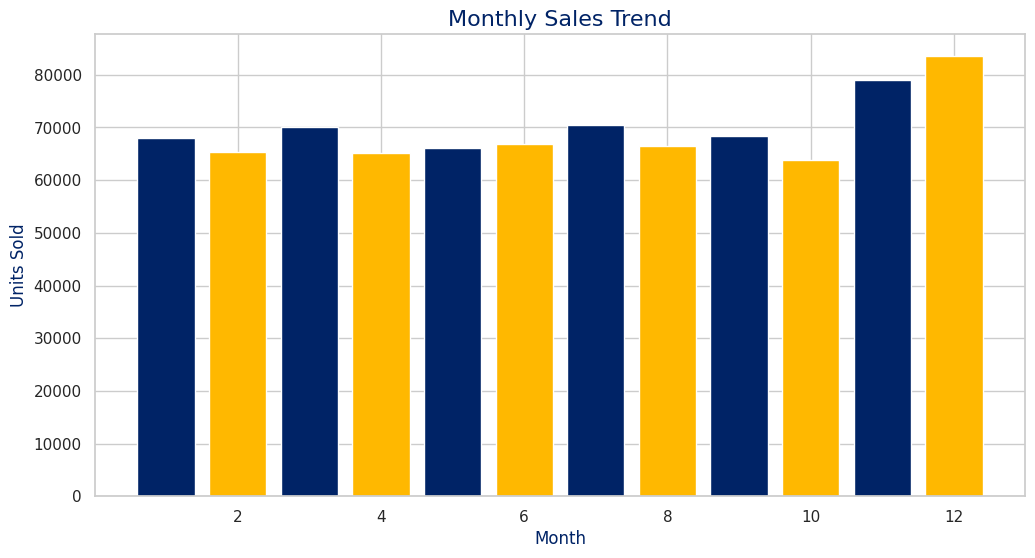

In [ ]:
dark_blue = "#002366"   # Dark Blue
dark_yellow = "#FFB800" # Dark Yellow

# Helper function to alternate colors
def get_bar_colors(n):
    return [dark_blue if i % 2 == 0 else dark_yellow for i in range(n)]

monthly_sales = df.groupby('Month')['Quantity'].sum()
colors = get_bar_colors(len(monthly_sales))
plt.bar(monthly_sales.index, monthly_sales.values, color=colors)
plt.title("Monthly Sales Trend", color=dark_blue, fontsize=16)
plt.xlabel("Month", color=dark_blue)
plt.ylabel("Units Sold", color=dark_blue)
plt.show()


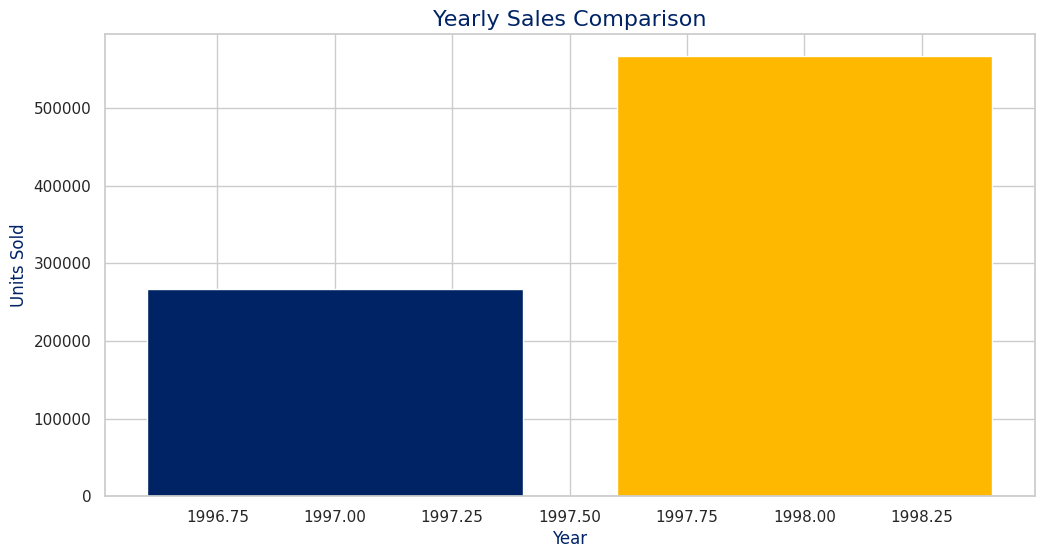

In [ ]:
yearly_sales = df.groupby('Year')['Quantity'].sum()
colors = get_bar_colors(len(yearly_sales))
plt.bar(yearly_sales.index, yearly_sales.values, color=colors)
plt.title("Yearly Sales Comparison", color=dark_blue, fontsize=16)
plt.xlabel("Year", color=dark_blue)
plt.ylabel("Units Sold", color=dark_blue)
plt.show()

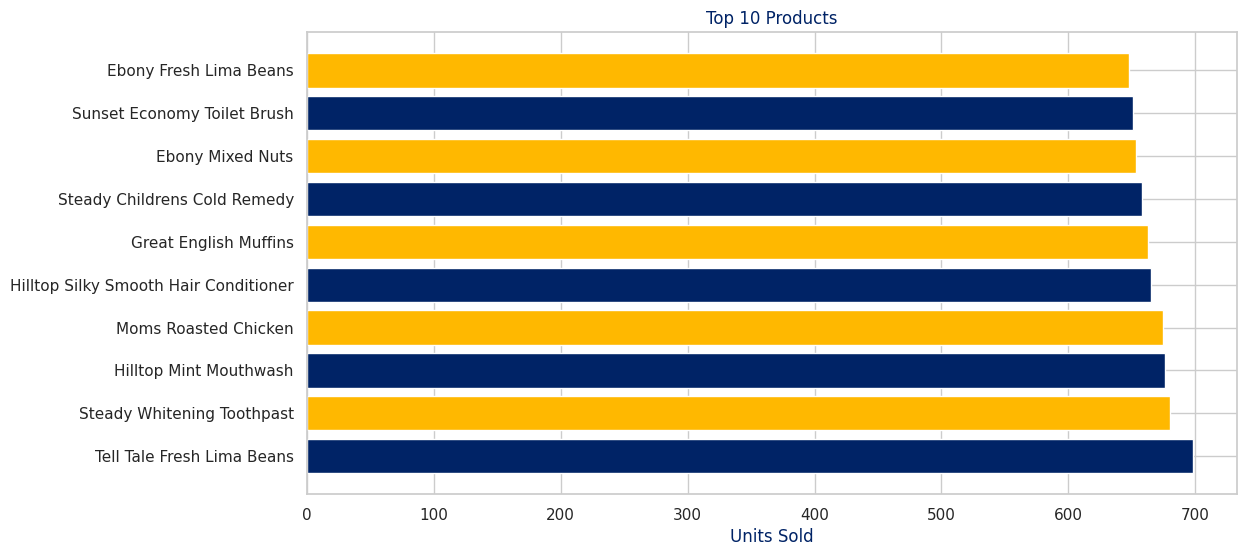

In [ ]:
top_products = df.groupby('product_name')['Quantity'].sum().sort_values(ascending=False).head(10)
colors = get_bar_colors(len(top_products))
plt.barh(top_products.index, top_products.values, color=colors)
plt.title("Top 10 Products", color=dark_blue)
plt.xlabel("Units Sold", color=dark_blue)
plt.show()


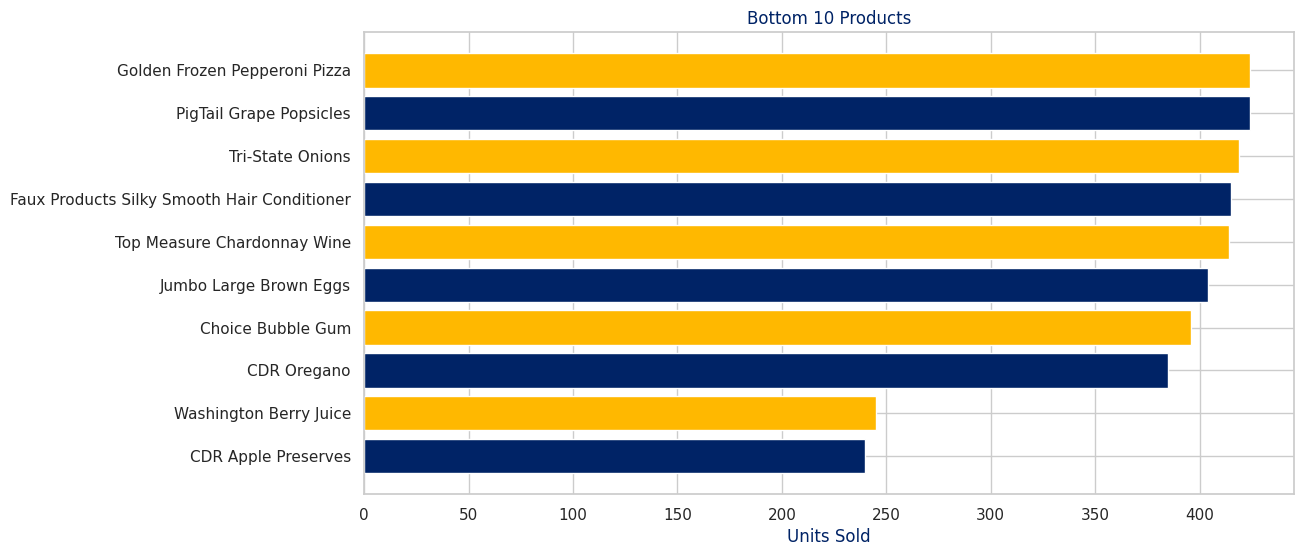

In [ ]:
bottom_products = df.groupby('product_name')['Quantity'].sum().sort_values().head(10)
colors = get_bar_colors(len(bottom_products))
plt.barh(bottom_products.index, bottom_products.values, color=colors)
plt.title("Bottom 10 Products", color=dark_blue)
plt.xlabel("Units Sold", color=dark_blue)
plt.show()


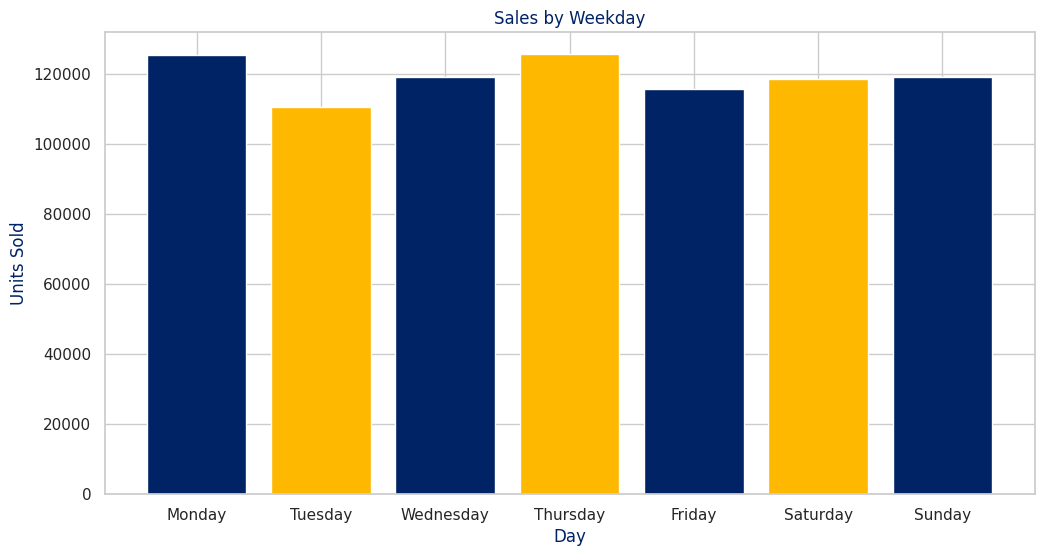

In [ ]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales = df.groupby('Weekday')['Quantity'].sum().reindex(weekday_order)
colors = get_bar_colors(len(weekday_sales))
plt.bar(weekday_sales.index, weekday_sales.values, color=colors)
plt.title("Sales by Weekday", color=dark_blue)
plt.xlabel("Day", color=dark_blue)
plt.ylabel("Units Sold", color=dark_blue)
plt.show()


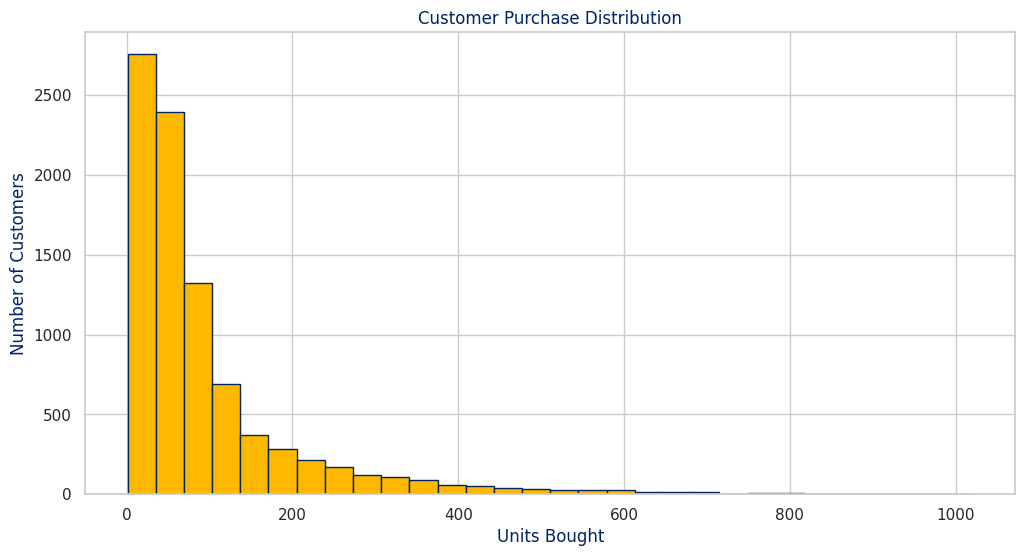

In [ ]:
customer_units = df.groupby('Customer Id')['Quantity'].sum()
plt.hist(customer_units, bins=30, color=dark_yellow, edgecolor=dark_blue)
plt.title("Customer Purchase Distribution", color=dark_blue)
plt.xlabel("Units Bought", color=dark_blue)
plt.ylabel("Number of Customers", color=dark_blue)
plt.show()

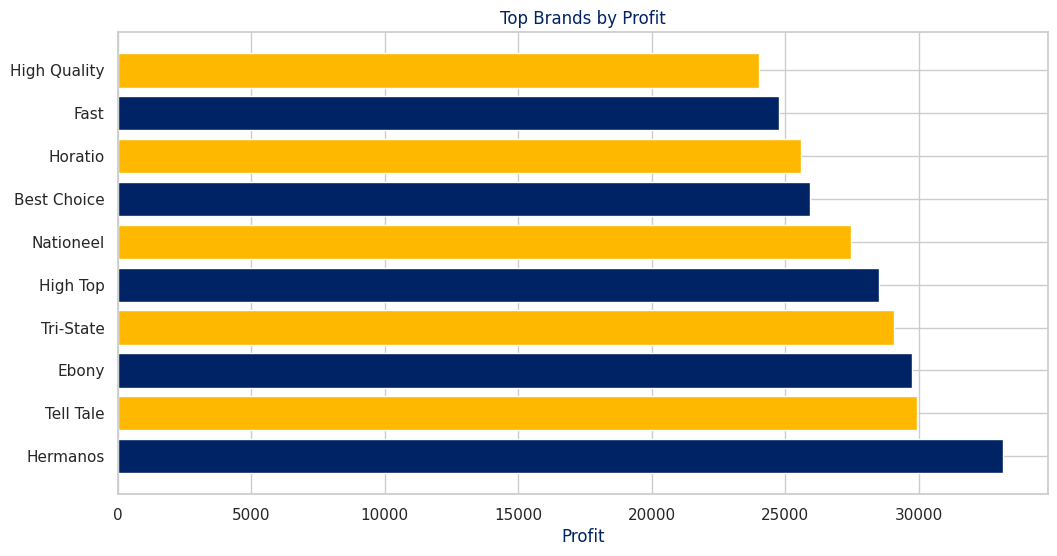

In [ ]:
df['Profit'] = df['Quantity'] * (df['product_retail_price'] - df['product_cost'])

# Top Brands by Profit
brand_profit = df.groupby('product_brand')['Profit'].sum().sort_values(ascending=False).head(10)
colors = get_bar_colors(len(brand_profit))
plt.barh(brand_profit.index, brand_profit.values, color=colors)
plt.title("Top Brands by Profit", color=dark_blue)
plt.xlabel("Profit", color=dark_blue)
plt.show()

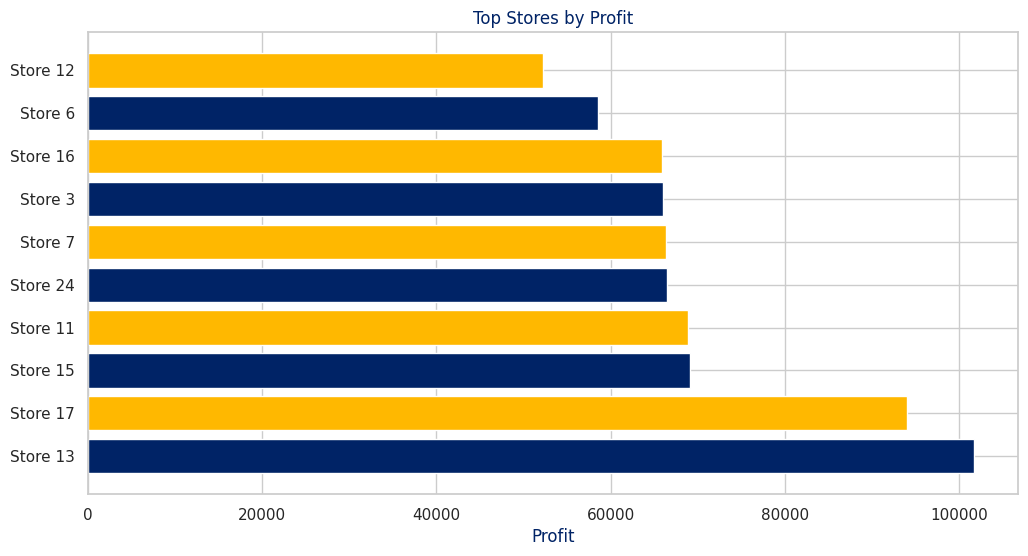

In [ ]:
store_profit = df.groupby('store_name')['Profit'].sum().sort_values(ascending=False).head(10)
colors = get_bar_colors(len(store_profit))
plt.barh(store_profit.index, store_profit.values, color=colors)
plt.title("Top Stores by Profit", color=dark_blue)
plt.xlabel("Profit", color=dark_blue)
plt.show()

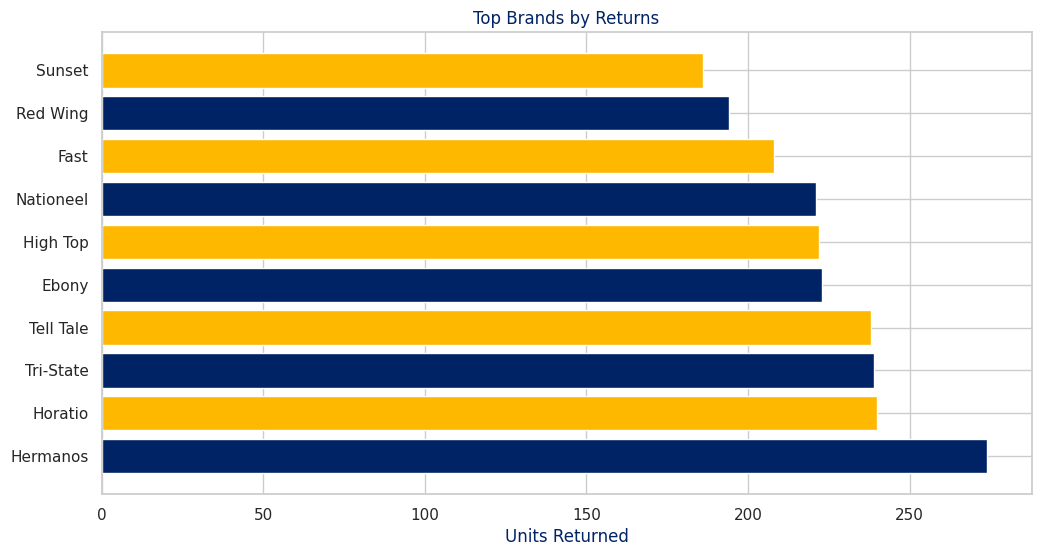

In [ ]:
returns_brand = returns.merge(products, how='left', left_on='product_id', right_on='product_id') \
                       .groupby('product_brand')['quantity'].sum().sort_values(ascending=False).head(10)
colors = get_bar_colors(len(returns_brand))
plt.barh(returns_brand.index, returns_brand.values, color=colors)
plt.title("Top Brands by Returns", color=dark_blue)
plt.xlabel("Units Returned", color=dark_blue)
plt.show()

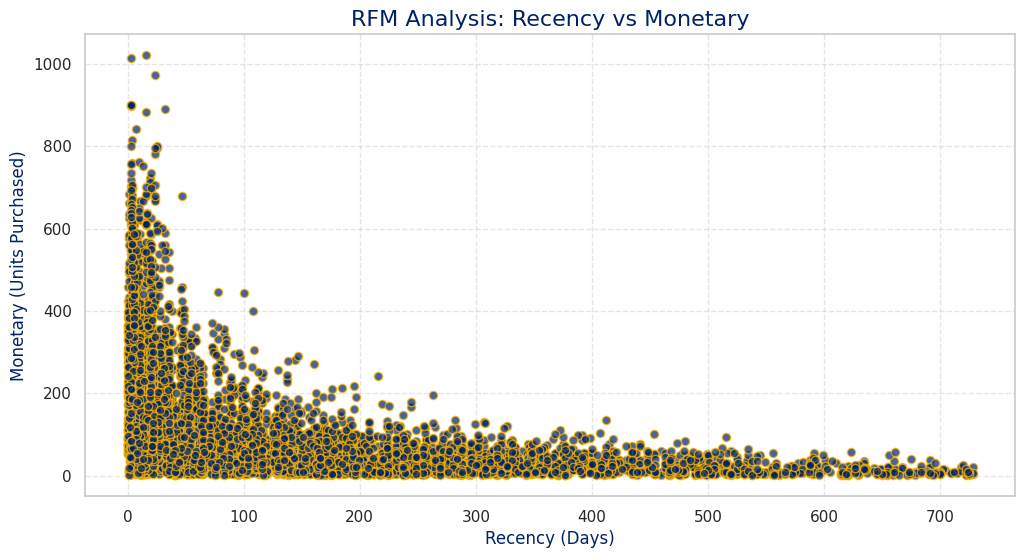

In [ ]:
snapshot = df['Transaction Date'].max()
rfm = df.groupby('Customer Id').agg({
    'Transaction Date': lambda x: (snapshot - x.max()).days,
    'Quantity': 'sum'
}).rename(columns={'Transaction Date':'Recency', 'Quantity':'Monetary'})

# Scatter plot: Recency vs Monetary
plt.scatter(rfm['Recency'], rfm['Monetary'], color=dark_blue, alpha=0.7, edgecolor=dark_yellow)
plt.title("RFM Analysis: Recency vs Monetary", color=dark_blue, fontsize=16)
plt.xlabel("Recency (Days)", color=dark_blue)
plt.ylabel("Monetary (Units Purchased)", color=dark_blue)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

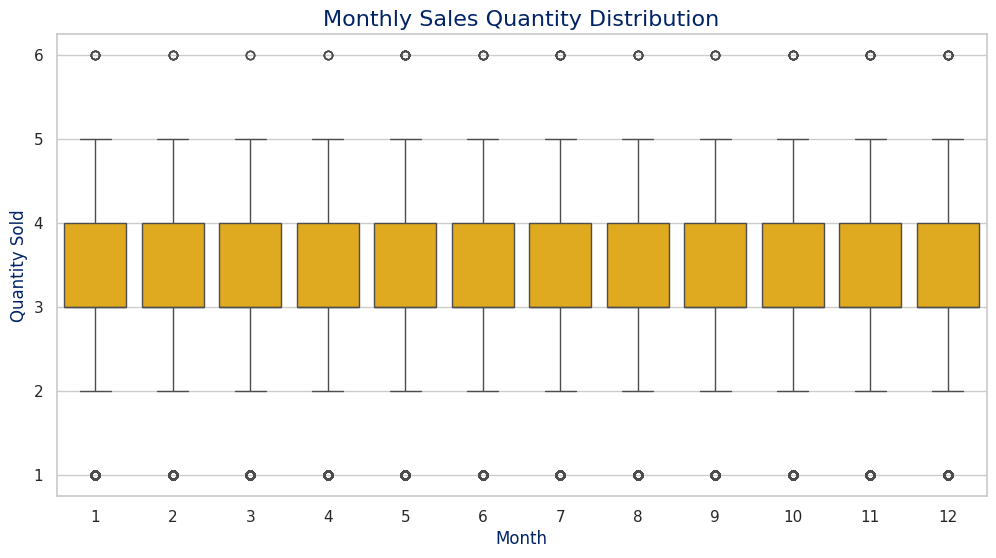

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Quantity', data=df, color=dark_yellow)
plt.title("Monthly Sales Quantity Distribution", color=dark_blue, fontsize=16)
plt.xlabel("Month", color=dark_blue)
plt.ylabel("Quantity Sold", color=dark_blue)
plt.show()
